In [30]:
from module_for_nn import modules as mdl
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Simple NN test

In [31]:
net = mdl.Sequential()
net.add(mdl.Linear(2, 2))
net.add(mdl.SoftMax())

criterion = mdl.ClassNLLCriterion()

print(net)

Linear (2, 2)
SoftMax



In [32]:
optimizer_config = {'learning_rate' : 1e-1}
optimizer_state = {}

n_epoch = 20
batch_size = 150

In [33]:
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

In [34]:
def simple_sgd(variables, gradients, config, state):  
    state.setdefault('accumulated_grads', {})
    
    var_index = 0 
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            
            current_var -= config['learning_rate'] * current_grad
            var_index += 1    

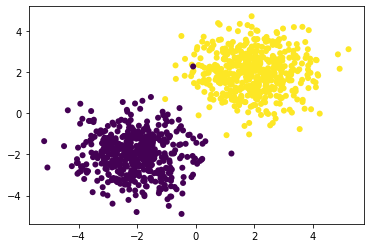

In [35]:
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

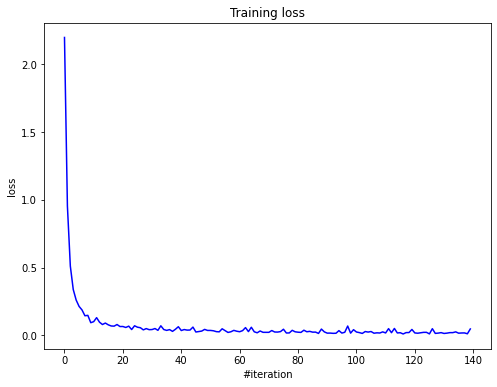

Current loss: 0.047152
Current loss2: 0.010000


In [36]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        net.zero_grad_parameters()
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        simple_sgd(
                   net.get_parameters(), 
                   net.get_grad_parameters(), 
                   optimizer_config,
                   optimizer_state)      
        loss_history.append(loss)
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))

    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    

    print('Current loss: %f' % loss) 
    print('Current loss2: %f' % np.mean(((net.forward(x_batch)[:,1] > 0.5) - y_batch[:,1]) ** 2)) 